In [38]:
global_epsilon = 0.000000001


def grad_descent_2d(func, low, high, callback=None):
    import numpy as np
    if low == 0:
        low = 0.00001
    best_estimate = func([low,low])

    def rotation(x, y, a):
        return [x*np.cos(a), x*np.sin(a)]
    
    def numerical_derivative_2d(func, epsilon):

        def grad_func(x):
            return (func([x, epsilon + global_epsilon])-func([x, epsilon]))/global_epsilon
        return grad_func
    
    
    def numerical_derivative_2dd(func, epsilon):

        def grad_func(y):
            return (func([global_epsilon + epsilon, y]) - func([epsilon, y])) / global_epsilon
        return grad_func

    def grad_res(x,y):
        a = numerical_derivative_2d(func, x/arr_shape)(y)
        b = numerical_derivative_2dd(func, y/arr_shape)(x)
        return a + b

    arr_shape = 100
    center = (high + low)/2
    radius = 1.3*(high - low) / (2*arr_shape)
    step = 1.3*(high - low) / (2*arr_shape)

    positions = np.array([0,0])

    dots = np.zeros((360, arr_shape),dtype = bool)
    x = np.sqrt(radius)
    y = np.sqrt(radius)

    x = radius
    y = 0

    for i in range(arr_shape):
        for a in range(360):
            temp = rotation(x, y, a)
            dots[a][i] = (numerical_derivative_2d(func,temp[1]*i+center)(temp[0]*i+center)+numerical_derivative_2dd(func,temp[0]*i+center)(temp[1]*i+center)) > 0
            if (dots[a][i-1] == False) and (dots[a][i] == True):
                positions = np.vstack((positions, np.array([a/10, i-1])))

    x = radius
    y = 0
    temp = rotation(x, y, positions[1][0])
    best_estimate1 = center + temp[0] * positions[1][1]
    best_estimate2 = center + temp[1] * positions[1][1]
    for i in range(2, len(positions)):
        temp = rotation(x, y, positions[i][0]/10)
        if func([best_estimate1, best_estimate2]) > func([center + temp[0]*positions[i][1], center + temp[1]*positions[i][1]]):
            best_estimate1 = center + temp[0]*positions[i][1]
            best_estimate2 = center + temp[1]*positions[i][1]

    for i in range(360):
        temp = rotation(x, y, i)
        if func([best_estimate1, best_estimate2]) > func([center + temp[0] * (arr_shape-1), center + temp[1] * (arr_shape-1)]):
            best_estimate1 = center + temp[0] * (arr_shape-1)
            best_estimate2 = center + temp[1] * (arr_shape-1)
            
    while abs(numerical_derivative_2d(func,best_estimate2)(best_estimate1)) > global_epsilon:
        step *= 0.95
        if numerical_derivative_2d(func,best_estimate2)(best_estimate1)>0:
            best_estimate2-=step
        else:
            best_estimate2+=step
            
    step = 1.3*(high - low) / (2*arr_shape)

    while abs(numerical_derivative_2dd(func,best_estimate1)(best_estimate2)) > global_epsilon:
        step *= 0.95
        if numerical_derivative_2dd(func,best_estimate1)(best_estimate2)>0:
            best_estimate1-=step
        else:
            best_estimate1+=step
    return [best_estimate1, best_estimate2]

In [39]:
import numpy as np
def A(x):
    return np.sin(x[0])*np.exp((1-np.cos(x[1]))**2)+np.cos(x[1])*np.exp((1-np.sin(x[0]))**2)+(x[0]-x[1])**2
def clb(a1, a2, b):
    print(a1, a2, b)

print(grad_descent_2d(A, -4, 4, clb))

[-1.5366618849972702, 3.1075656014885924]


<IPython.core.display.Javascript object>


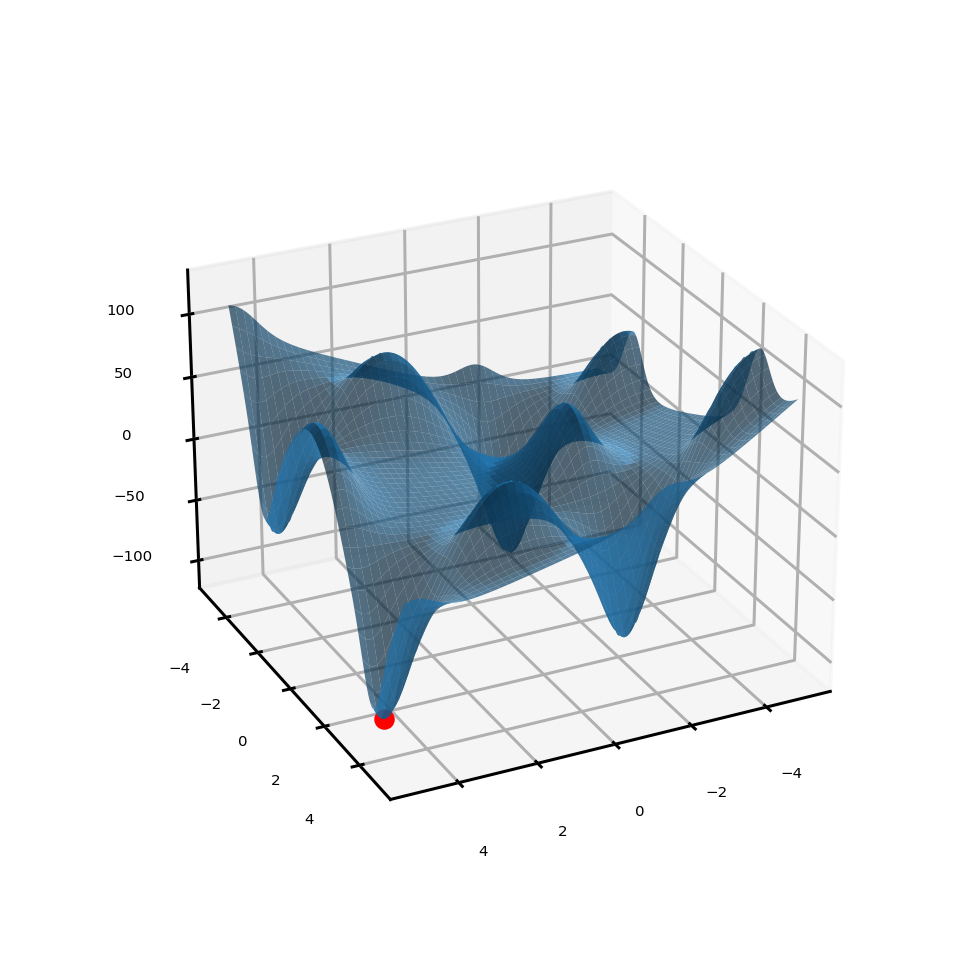

In [44]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

plt.rcParams['figure.figsize']=(4,4)
plt.rcParams['figure.dpi']=300
plt.rcParams['xtick.labelsize']=4
plt.rcParams['ytick.labelsize']=4

fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
inp = grad_descent_2d(A, -5, 5, clb)
ax.scatter(inp[0],inp[1],A([inp[0],inp[1]]),color='red')
i = np.arange(-5, 5, 0.02)
X, Y = np.meshgrid(i, i)
Z = np.sin(X)*np.exp((1-np.cos(Y))**2)+np.cos(Y)*np.exp((1-np.sin(X))**2)+(X-Y)**2
ax.plot_surface(X, Y, Z, rstride=10, cstride=10,alpha=0.7)
plt.show()